In [1]:
# ! pip install xgboost

In [2]:
#Data manipulation libraries
import pandas as pd
import numpy as np
import seaborn as sb

#Data pre-processing Libraries
from sklearn.preprocessing import LabelEncoder

#Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

#for bell curve
import scipy.stats as sci

#Importing VIF for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing train test split
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve

#Transforming data into normal form (0 and 1)
from sklearn.preprocessing import StandardScaler

from sklearn import metrics


#Importing regressor models
from sklearn.linear_model import LinearRegression

#importing metrics for evaluation
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score



#Importing regressor models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import xgboost

#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
df1 = pd.read_excel("Medibuddy insurance data personal details.xlsx")

In [4]:
df2 = pd.read_csv("Medibuddy Insurance Data Price.csv")

In [5]:
df1.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [6]:
df1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
df1.children.unique()

array([0, 1, 5, 2, 3, 4], dtype=int64)

In [8]:
df1.smoker.unique()

array(['no', 'yes'], dtype=object)

In [9]:
df2.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


## Checking Missing Values

In [10]:
df1.isnull().sum()

Policy no.    0
children      0
smoker        0
region        0
dtype: int64

In [11]:
df2.isnull().sum()

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

#### ENCODING:

In [12]:
le = LabelEncoder()

In [13]:
df1['region'] = le.fit_transform(df1['region'])
df1['smoker'] = le.fit_transform(df1['smoker'])
df2['sex'] = le.fit_transform(df2['sex'])

In [14]:
df1.head()

,Policy no.,children,smoker,region
0,PLC157006,0,0,3
1,PLC157033,1,0,3
2,PLC157060,0,0,3
3,PLC157087,1,0,3
4,PLC157186,5,0,3


In [15]:
df2.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,0,27.900,16884.92400
1,PLC156907,18,1,33.770,1725.55230
2,PLC156916,28,1,33.000,4449.46200
3,PLC156925,33,1,22.705,21984.47061
4,PLC156934,32,1,28.880,3866.85520


###  Unique Values:

In [16]:
print(f'Children : {df1.children.nunique()}')
print(f'Smoker : {df1.smoker.nunique()}')
print(f'region : {df1.region.nunique()}')
print(f'Age : {df2.age.nunique()}')
print(f'Sex : {df2.sex.nunique()}')
print(f'BMI : {df2.bmi.nunique()}')


Children : 6
Smoker : 2
region : 4
Age : 47
Sex : 2
BMI : 548


In [17]:
df1.shape

(1338, 4)

In [18]:
df2.shape

(1338, 5)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Policy no.  1338 non-null   object
 1   children    1338 non-null   int64 
 2   smoker      1338 non-null   int32 
 3   region      1338 non-null   int32 
dtypes: int32(2), int64(1), object(1)
memory usage: 31.5+ KB


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   int32  
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 47.2+ KB


In [21]:
df1.describe() 

,children,smoker,region
count,1338.000000,1338.000000,1338.000000
mean,1.094918,0.204783,1.515695
std,1.205493,0.403694,1.104885
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,2.000000
75%,2.000000,0.000000,2.000000
max,5.000000,1.000000,3.000000


In [22]:
df2.describe()

,age,sex,bmi,charges in INR
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,13270.422265
std,14.049960,0.500160,6.098187,12110.011237
min,18.000000,0.000000,15.960000,1121.873900
25%,27.000000,0.000000,26.296250,4740.287150
50%,39.000000,1.000000,30.400000,9382.033000
75%,51.000000,1.000000,34.693750,16639.912515
max,64.000000,1.000000,53.130000,63770.428010


### Joining two dataframes 

In [23]:
new_df = pd.merge(df1,df2, on="Policy no.")

In [24]:
new_df.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,0,3,23,1,34.4,1826.843
1,PLC157033,1,0,3,19,1,24.6,1837.237
2,PLC157060,0,0,3,56,1,40.3,10602.385
3,PLC157087,1,0,3,30,0,32.4,4149.736
4,PLC157186,5,0,3,19,0,28.6,4687.797


In [25]:
new_df= new_df.drop(['Policy no.'], axis = 1)

In [26]:
new_df.head()

,children,smoker,region,age,sex,bmi,charges in INR
0,0,0,3,23,1,34.4,1826.843
1,1,0,3,19,1,24.6,1837.237
2,0,0,3,56,1,40.3,10602.385
3,1,0,3,30,0,32.4,4149.736
4,5,0,3,19,0,28.6,4687.797


In [27]:
new_df.columns

Index(['children', 'smoker', 'region', 'age', 'sex', 'bmi', 'charges in INR'], dtype='object')

## Building a custom summary function for EDA.

In [28]:
def describe(my_id):
    cols = []
    for i in my_id.columns:
        if my_id[i].dtype != object:
            cols.append(i)
    result = pd.DataFrame(columns= cols, index= ['Datatype', 'Count', 'Min', 'Q1', 'Q2', 'Mean', 'Q3', 'Max', 'Std',
                                                 'Skewness', 'Kurtosis', 'Range', 'IQR', 'Skewness comment', 'Outlier comment',
                                                'Kurtosis comment'])
    for i in result.columns:
        result.loc['Datatype',i] = my_id[i].dtype
        result.loc['Count',i] = my_id[i].count()
        result.loc['Min',i] = my_id[i].min()
        result.loc['Q1',i] = my_id[i].quantile(0.25)
        result.loc['Q2',i] =my_id[i].quantile(0.5)
        result.loc['Mean',i] =round(my_id[i].mean(),2)
        result.loc['Q3',i] =my_id[i].quantile(0.75)
        result.loc['Max',i] =my_id[i].max()
        result.loc['Std',i] =round(my_id[i].std(),2)
        result.loc['Skewness',i] =round(my_id[i].skew(),2)
        result.loc['Kurtosis',i] =round(my_id[i].kurt(),2)
        result.loc['Range',i] = my_id[i].max() - my_id[i].min()
        result.loc['IQR',i] = my_id[i].quantile(0.75) - my_id[i].quantile(0.25)
        
        
        #Adding comments for skewness
        if result.loc['Skewness', i] <= -1:
            sk_label = 'Highly negatively skewed'
        elif -1  < result.loc['Skewness', i] <= -0.5:
            sk_label = 'Moderatively negatively Skewed'
        elif -0.5  < result.loc['Skewness', i] < 0:
            sk_label = 'Approximately Normal distribution(-ve)'
        elif 0  <= result.loc['Skewness', i] < 0.5:
            sk_label = 'Approximately Normal distribution(+ve)'
        elif 0.5  <= result.loc['Skewness', i] < 1:
            sk_label = 'Moderatively positively Skewed'
        elif result.loc['Skewness', i] >= 1:
            sk_label = 'Highly positively Skewed'
        else:
            sk_label = 'Error'
            
        result.loc['Skewness comment', i] = sk_label
            
            
            
         #Adding comments for Kurtosis
        if result.loc['Kurtosis', i] <= -1:
            kt_label = 'Highly platykurtic curve'
        elif -1  < result.loc['Kurtosis', i] <= -0.5:
            kt_label = 'Moderatively platykurtic curve'
        elif -0.5  < result.loc['Kurtosis', i] < 0.5:
            kt_label = 'Mesokurtic curve'
        elif 0.5  <= result.loc['Kurtosis', i] < 1:
            kt_label = 'Moderatively laptokurtic curve'
        elif result.loc['Kurtosis', i] >= 1:
            kt_label = 'Highly laptokurtic curve'
        else:
            kt_label = 'Error'
            
        result.loc['Kurtosis comment', i] = kt_label
        
        
        #Adding comments for Outliers
        upper_limit = result.loc['Q3', i]+ (1.5 * result.loc['IQR', i])
        lower_limit = result.loc['Q1', i]- (1.5 * result.loc['IQR', i])
        if len([x for x in  my_id[i] if x < lower_limit or x > upper_limit]) > 0:
            outlier_label = 'Have outliers'
        else:
            outlier_label = 'No outliers'
        result.loc['Outlier comment', i] = outlier_label
    display(result)

In [29]:
describe(new_df)

,children,smoker,region,age,sex,bmi,charges in INR
Datatype,int64,int32,int32,int64,int32,float64,float64
Count,1338,1338,1338,1338,1338,1338,1338
Min,0,0,0,18,0,15.96,1121.8739
Q1,0.0,0.0,1.0,27.0,0.0,26.29625,4740.28715
Q2,1.0,0.0,2.0,39.0,1.0,30.4,9382.033
Mean,1.09,0.2,1.52,39.21,0.51,30.66,13270.42
Q3,2.0,0.0,2.0,51.0,1.0,34.69375,16639.912515
Max,5,1,3,64,1,53.13,63770.42801
Std,1.21,0.4,1.1,14.05,0.5,6.1,12110.01
Skewness,0.94,1.46,-0.04,0.06,-0.02,0.28,1.52


### Anaysis:
1- No missing Values in the data

2- All the features are Numerical

## Multicollinearity Check

# performing Outlier Treatment

In [30]:
corr1 = new_df.corr()


<AxesSubplot:>

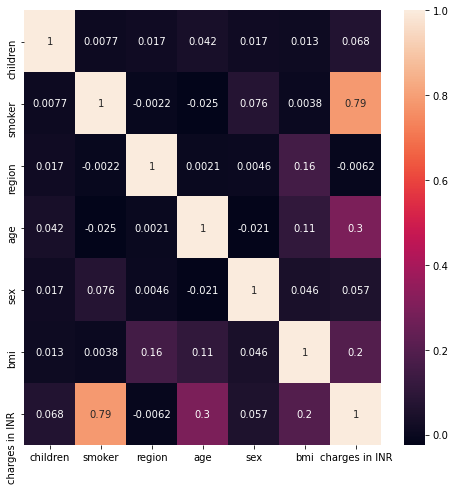

In [31]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr1, annot= True)


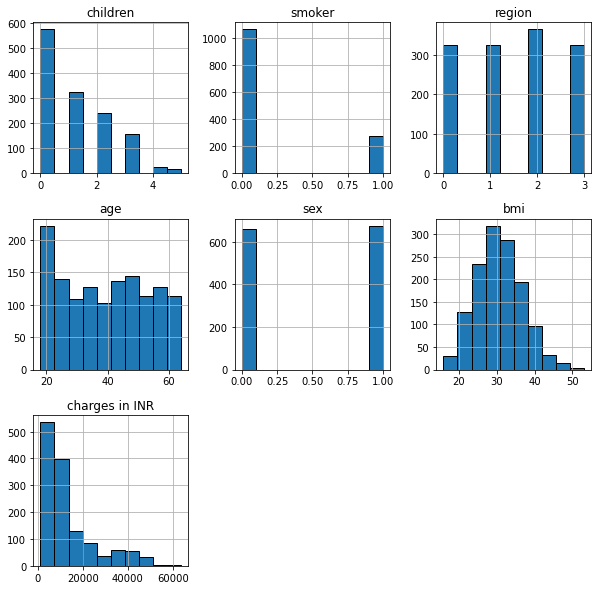

In [32]:
new_df.hist(figsize=(10,10),edgecolor='black');

#Analysis: High correlation is observed only with smoking

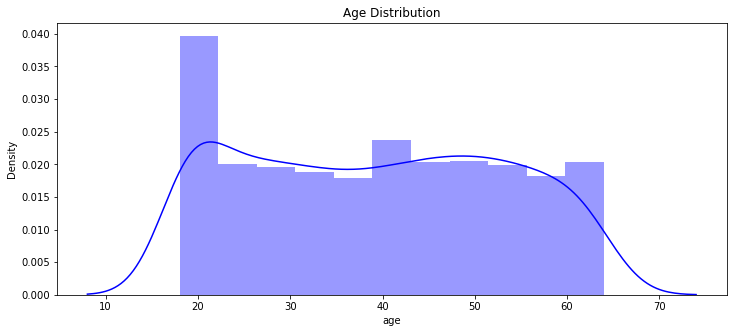

In [83]:
plt.figure(figsize=(12,5))
plt.title("Age Distribution")
ax = sns.distplot(new_df["age"], color = 'b')

#Analysis:
- Min age: 18, Max age:64 


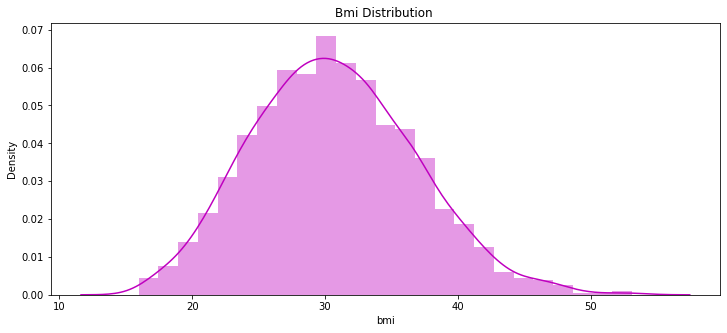

In [77]:
plt.figure(figsize=(12,5))
plt.title("Bmi Distribution ")
ax = sns.distplot(new_df["b`mi"], color = 'm')

Text(0.5, 1.0, 'Region wise smokers count')

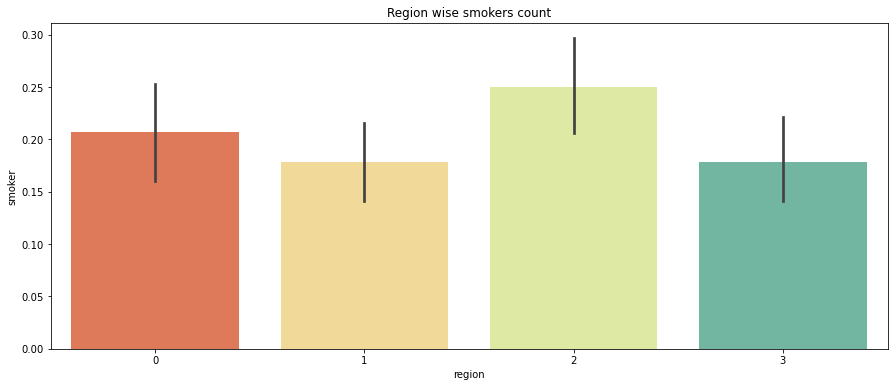

In [33]:
ax= plt.figure(figsize=(15,6))
sb.barplot(x='region', y='smoker', data=new_df, palette='Spectral' )
plt.title('Region waise smokers count')

Text(0.5, 1.0, 'Age wise BMI distribution')

<Figure size 1080x432 with 0 Axes>

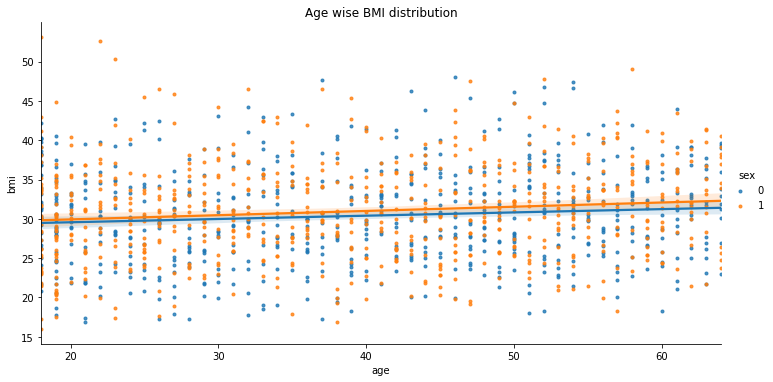

In [34]:
ax= plt.figure(figsize=(15,6))
sb.lmplot(x='age', y= 'bmi',data=new_df, markers='.',hue='sex',height=5,aspect=2)
plt.title('Age wise BMI distribution')

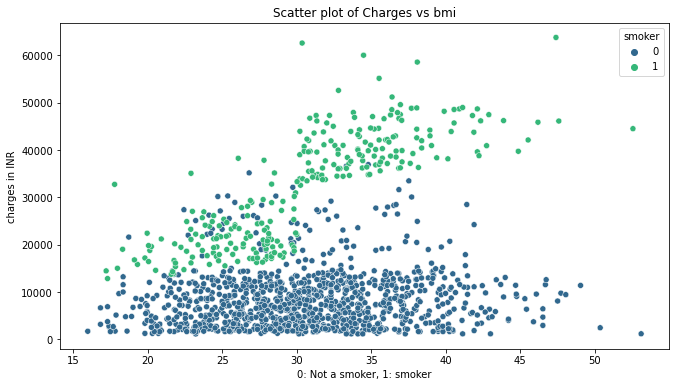

In [35]:
f = plt.figure(figsize=(24,6))
ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges in INR',data=new_df,palette='viridis',hue='smoker')
plt.xlabel('0: Not a smoker, 1: smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

#### Analysis

a)Most of the people who smoke are obese people

b)Even though a person is not obese but he/she smokes, his/her charges tends to be higher.

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

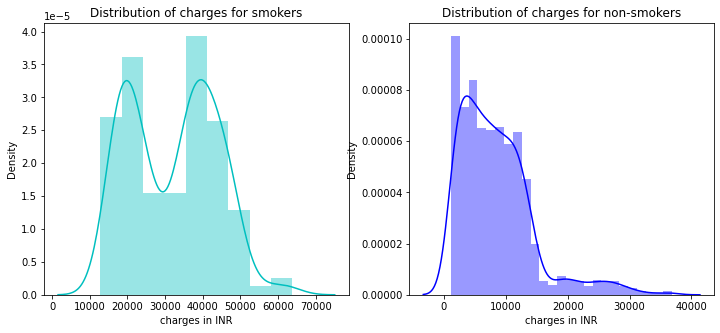

In [62]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(new_df[(new_df.smoker == 1)]["charges in INR"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(new_df[(new_df.smoker == 0)]['charges in INR'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

#### Analysis:  
Those who are Smoking patients spend more on medical treatment whereas the number of non-smoking patients is greater.
    

In [37]:
new_df.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

In [38]:
df2.sex.unique()

array([0, 1])

In [39]:
df1.smoker.unique()

array([0, 1])

Text(0.5, 6.79999999999999, '0:Male, 1: Female')

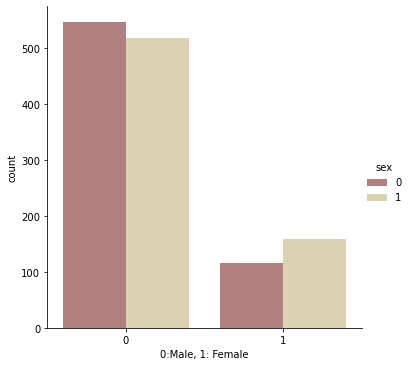

In [66]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=new_df)
plt.xlabel('0:Male, 1: Female') 

#### Analysis:
- Males tend to smoke more than female
- We can assume that the total cost of treatment in Male will be more than in Female

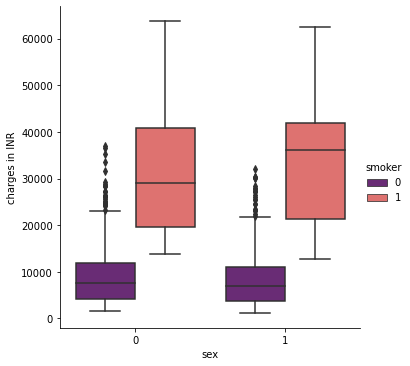

In [68]:
sns.catplot(x="sex", y="charges in INR", hue="smoker",
            kind="box", data=new_df, palette = 'magma')

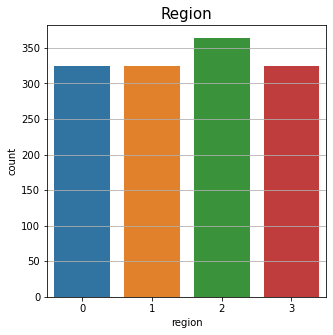

In [41]:
plt.figure(figsize=(5,5))
plt.grid()
sns.countplot(x='region', data= new_df)
plt.title("Region", fontsize=15)
plt.show()

<AxesSubplot:title={'center':'Box plot for charges of Female'}, xlabel='charges in INR', ylabel='smoker'>

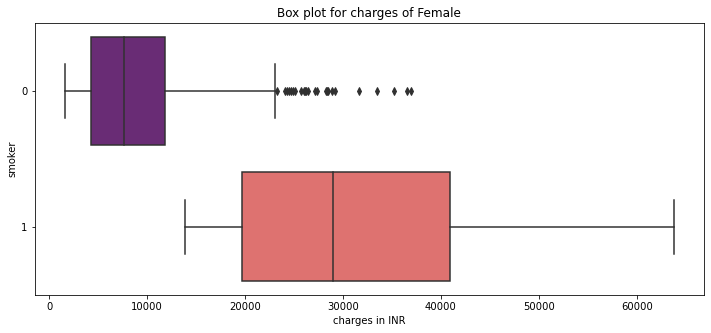

In [73]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of Male")
sns.boxplot(y="smoker", x="charges in INR", data = new_df[(new_df.sex == 0)] , orient="h", palette = 'magma')

<AxesSubplot:title={'center':'Box plot for charges of Male'}, xlabel='charges in INR', ylabel='smoker'>

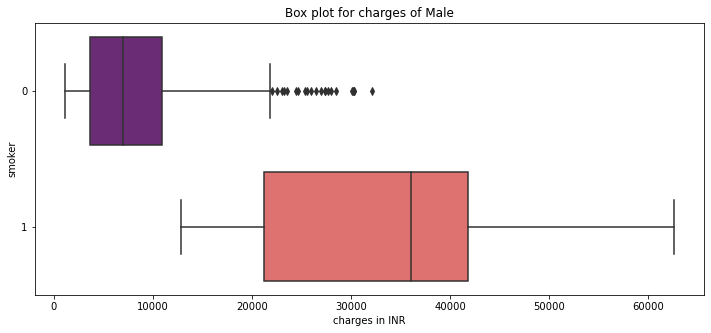

In [74]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of Male")
sns.boxplot(y="smoker", x="charges in INR", data = new_df[(new_df.sex == 1)] , orient="h", palette = 'magma')

Text(0.5, 1.0, 'Age vs BMI')

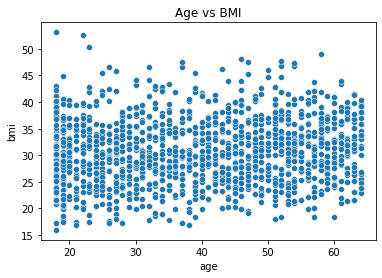

In [42]:
sns.scatterplot(data=new_df, x='age', y='bmi')
plt.title('Age vs BMI')

### Conclusion:
Region and gender does not bring significant difference on charges among its groups. Age, BMI, number of children and smoking are the once that drives the charges.

## Train/Test split
1. Split data into two part : a training set and a testing set
2. Training the model on training set
3. Testing the Model on Testing set

In [43]:
new_df.head()

,children,smoker,region,age,sex,bmi,charges in INR
0,0,0,3,23,1,34.4,1826.843
1,1,0,3,19,1,24.6,1837.237
2,0,0,3,56,1,40.3,10602.385
3,1,0,3,30,0,32.4,4149.736
4,5,0,3,19,0,28.6,4687.797


In [44]:
X =new_df.drop(['charges in INR'], axis = 1)
y = new_df['charges in INR']

In [45]:
X.head()

,children,smoker,region,age,sex,bmi
0,0,0,3,23,1,34.4
1,1,0,3,19,1,24.6
2,0,0,3,56,1,40.3
3,1,0,3,30,0,32.4
4,5,0,3,19,0,28.6


In [46]:
y.head()

0     1826.843
1     1837.237
2    10602.385
3     4149.736
4     4687.797
Name: charges in INR, dtype: float64

In [47]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=32)

In [48]:
#lr = LinearRegression()
#lr.fit(X_train,y_train) 

In [49]:
#pred = lr.predict(X_test)
#mean_squared_error(y_test, pred)

In [50]:
def train_and_test_split(data, tcol, Test_size=0.2, Random_state = 42):
    x = data.drop(tcol, axis= 1)
    y = data[tcol]
    return train_test_split(x, y, test_size= Test_size, random_state=Random_state)

In [51]:
def build_model(model_name, estimator, data, tcol):
    xtrain, xtest, ytrain, ytest = train_and_test_split(data, tcol)
    estimator.fit(xtrain, ytrain)
    ypred = estimator.predict(xtest)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    accuracy = r2_score(ytest, ypred)
    return [model_name, rmse, accuracy]

In [52]:
build_model(model_name= 'Linear Regression', estimator= LinearRegression(), data= new_df, tcol= 'charges in INR')

['Linear Regression', 6182.162288729437, 0.7310354872877263]

In [53]:
def multiple_models(data, tcol):
    colnames = ['model_name', 'rmse', 'r2_score']
    result = pd.DataFrame(columns= colnames)
    result.loc[len(result)] = build_model('Linear regression', LinearRegression(), data, tcol)
    result.loc[len(result)] = build_model('Lasso regression', Lasso(), data, tcol)
    result.loc[len(result)] = build_model('Ridge regression', Ridge(), data, tcol)
    result.loc[len(result)] = build_model('SVR', SVR(), data, tcol)
    result.loc[len(result)] = build_model('KNeighborsRegressor', KNeighborsRegressor(), data, tcol)
    result.loc[len(result)] = build_model('RandomForestRegressor', RandomForestRegressor(), data, tcol)
    result.loc[len(result)] = build_model('XGBRegressor', XGBRegressor(), data, tcol)
    result.loc[len(result)] = build_model('DecisionTreeRegressor', DecisionTreeRegressor(), data, tcol)
    result.loc[len(result)] = build_model('AdaBoostRegressor', AdaBoostRegressor(), data, tcol)
    result.loc[len(result)] = build_model('GradientBoostingRegressor', GradientBoostingRegressor(), data, tcol)
    
    return result.sort_values('r2_score', ascending= False)

In [54]:
multiple_models(data=new_df, tcol='charges in INR')

,model_name,rmse,r2_score
9,GradientBoostingRegressor,4428.755329,0.861969
5,RandomForestRegressor,4686.850003,0.845412
6,XGBRegressor,5098.629331,0.817055
8,AdaBoostRegressor,5376.289514,0.796587
7,DecisionTreeRegressor,5917.678786,0.753557
2,Ridge regression,6177.264787,0.731461
1,Lasso regression,6182.111067,0.731040
0,Linear regression,6182.162289,0.731035
4,KNeighborsRegressor,11262.598802,0.107329
3,SVR,12688.837624,-0.133073


# Cross Validation

In [55]:
def K_fold_CV(x, y, fold=10):
    score_lr = cross_val_score(LinearRegression(), x, y, cv= fold)
    score_la = cross_val_score(Lasso(), x, y, cv= fold)
    score_ri = cross_val_score(Ridge(), x, y, cv= fold)
    score_svr = cross_val_score(SVR(), x, y, cv= fold)
    score_dt = cross_val_score(DecisionTreeRegressor(), x, y, cv= fold)
    score_knn = cross_val_score(KNeighborsRegressor(), x, y, cv= fold)
    score_rm = cross_val_score(RandomForestRegressor(), x, y, cv= fold)
    score_ad = cross_val_score(AdaBoostRegressor(), x, y, cv= fold)
    score_gr = cross_val_score(GradientBoostingRegressor(), x, y, cv= fold)
    score_xgb = cross_val_score(XGBRegressor(), x, y, cv= fold)
    
    model_names = ['LinearRegression', 'Lasso', 'Ridge', 'SVR', 'DecisionTreeRegressor', 'KNeighborsRegressor', 
                   'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor', 'XGBRegressor']
    
    scores = [score_lr, score_la, score_ri, score_svr, score_dt, score_knn, score_rm, score_ad, score_gr, score_xgb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names, score_mean, score_std]
        result.append(temp)
    
    K_fold_df = pd.DataFrame(result, columns= ['model_names', 'score_mean', 'score_std'])
    return K_fold_df.sort_values('score_mean', ascending= False)

In [56]:
K_fold_CV(x = new_df.drop('charges in INR', axis=1), y=new_df['charges in INR'])

,model_names,score_mean,score_std
8,GradientBoostingRegressor,0.525134,0.192225
6,RandomForestRegressor,0.432526,0.236528
7,AdaBoostRegressor,0.394573,0.257959
9,XGBRegressor,0.332209,0.229271
2,Ridge,0.288731,0.138789
1,Lasso,0.288694,0.138603
0,LinearRegression,0.288675,0.138599
4,DecisionTreeRegressor,-0.033867,0.537436
3,SVR,-0.900076,1.770096
5,KNeighborsRegressor,-1.359471,1.230547


### Hyperparameter tuning

In [57]:
def tuning(x,y, fold= 10):
    #parameter grid for all the models
    param_dt = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_features': ['auto','sqrt','log2',2,3,4,5,6,7,8]}
    param_knn = {'n_neighbors': [5, 10, 20, 40, 60, 80, 100]}
    param_rf = {'n_estimators': [100, 200, 300], 'max_depth': [3,5,7,10]}
    param_ad = {'n_estimators': [100, 200, 300], 'loss': ['linear', 'square', 'exponential']} #, 'base_estimator': ['LinearRegression', 'DecisionTreeRegressor']
    param_gr = {'n_estimators': [200, 300], 'learning_rate':[0.1, 0.01]}
    param_xgb = {'eta': [0.01, 0.1, 0.3], 'max_depth':[3,5,7,10], 'subsample': [0.5, 0.7, 1]}
    param_rd = {'alpha': [1e-15, 1e-13, 1e-11, 1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 0, 1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_ls = {'alpha': [1e-15, 1e-13, 1e-11, 1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 0, 1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_svr = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
                
    
    
# hyperparameter tuning (passing hyperparameters in gridsearch)

    tuned_las = GridSearchCV(Lasso(), param_ls, cv= fold)
    tuned_rd = GridSearchCV(Ridge(), param_rd, cv= fold)
    tuned_knn = GridSearchCV(KNeighborsRegressor(), param_knn, cv= fold)
    tuned_dt = GridSearchCV(DecisionTreeRegressor(), param_dt, cv= fold)
    tuned_rf = GridSearchCV(RandomForestRegressor(), param_rf, cv= fold)
    tuned_ad = GridSearchCV(AdaBoostRegressor(), param_ad, cv= fold)
    tuned_gr = GridSearchCV(GradientBoostingRegressor(), param_gr, cv= fold)
    tuned_xgb = GridSearchCV(XGBRegressor(), param_xgb, cv= fold)
    tunned_svr = GridSearchCV(SVR(), param_svr, cv=fold)
    
    
#Fitting x and y
    tuned_las.fit(x, y)
    tuned_rd.fit(x, y)
    tuned_knn.fit(x, y)
    tuned_dt.fit(x, y)
    tuned_rf.fit(x, y)
    tuned_ad.fit(x, y)
    tuned_gr.fit(x, y)
    tuned_xgb.fit(x, y)
    tunned_svr.fit(x,y)
    
    tune = [tuned_las, tuned_rd, tuned_knn, tuned_dt, tuned_rf, tuned_ad, tuned_gr, tuned_xgb, tunned_svr]
    models = ['Lasso', 'Ridge', 'Knn', 'Decision_Tree', 'Random_forest', 'Adaboost', 'Gboost', 'XGBoost','SVR']
    for i in range(len(tune)):
        print('models: ', models[i])
        print('best_params: ',tune[i].best_params_)

In [58]:
tuning(new_df.drop('charges in INR', axis=1), y= new_df['charges in INR'])

models:  Lasso
best_params:  {'alpha': 50}
models:  Ridge
best_params:  {'alpha': 1}
models:  Knn
best_params:  {'n_neighbors': 100}
models:  Decision_Tree
best_params:  {'criterion': 'friedman_mse', 'max_features': 'auto'}
models:  Random_forest
best_params:  {'max_depth': 5, 'n_estimators': 300}
models:  Adaboost
best_params:  {'loss': 'linear', 'n_estimators': 300}
models:  Gboost
best_params:  {'learning_rate': 0.01, 'n_estimators': 300}
models:  XGBoost
best_params:  {'eta': 0.1, 'max_depth': 3, 'subsample': 1}
models:  SVR
best_params:  {'C': 10000, 'gamma': 0.01, 'kernel': 'rbf'}


### Post hyperparameter tuning

In [59]:
def cv_post_hpt(x, y, fold=10):
    score_lr = cross_val_score(LinearRegression(), x, y, cv= fold)
    score_la = cross_val_score(Lasso(alpha =50), x, y, cv= fold)
    score_ri = cross_val_score(Ridge(alpha =1), x, y, cv= fold)
    score_svr = cross_val_score(SVR(C=1000, gamma=0.01, kernel='rbf'), x, y, cv= fold)
    score_dt = cross_val_score(DecisionTreeRegressor(criterion='friedman_mse' , max_features= 2), x, y, cv= fold)
    score_knn = cross_val_score(KNeighborsRegressor(n_neighbors= 100), x, y, cv= fold)
    score_rm = cross_val_score(RandomForestRegressor(n_estimators =300 , max_depth=5 ), x, y, cv= fold)
    score_ad = cross_val_score(AdaBoostRegressor(n_estimators=100 , loss='linear'), x, y, cv= fold)
    score_gr = cross_val_score(GradientBoostingRegressor(n_estimators=300 , learning_rate=0.01 ), x, y, cv= fold)
    score_xgb = cross_val_score(XGBRegressor(eta=0.1 , max_depth=3 , subsample=1 ), x, y, cv= fold)
    
    model_names = ['LinearRegression', 'Lasso', 'Ridge', 'SVR', 'DecisionTreeRegressor', 'KNeighborsRegressor', 
                   'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor', 'XGBRegressor']
    
    scores = [score_lr, score_la, score_ri, score_svr, score_dt, score_knn, score_rm, score_ad, score_gr, score_xgb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names, score_mean, score_std]
        result.append(temp)
    
    K_fold_df = pd.DataFrame(result, columns= ['model_names', 'score_mean', 'score_std'])
    return K_fold_df.sort_values('score_mean', ascending= False)

In [60]:
cv_post_hpt(new_df.drop('charges in INR', axis=1), y= new_df['charges in INR'])

,model_names,score_mean,score_std
8,GradientBoostingRegressor,0.533048,0.188052
9,XGBRegressor,0.530186,0.194214
6,RandomForestRegressor,0.530103,0.193930
7,AdaBoostRegressor,0.388006,0.267396
1,Lasso,0.289356,0.139397
2,Ridge,0.288731,0.138789
0,LinearRegression,0.288675,0.138599
4,DecisionTreeRegressor,-0.236136,0.545793
3,SVR,-0.643436,2.036376
5,KNeighborsRegressor,-1.061733,1.203685
